In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D

import numpy as np
from glob import glob


# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:/abhinav/Proj/Train'
valid_path = 'C:/abhinav/Proj/Test'

# useful for getting number of output classes
folders = glob('C:/abhinav/Proj/Train/*')

print(folders)
print(len(folders))

['C:/abhinav/Proj/Train\\1Hundrednote', 'C:/abhinav/Proj/Train\\2Hundrednote', 'C:/abhinav/Proj/Train\\2Thousandnote', 'C:/abhinav/Proj/Train\\5Hundrednote', 'C:/abhinav/Proj/Train\\Fiftynote', 'C:/abhinav/Proj/Train\\Tennote', 'C:/abhinav/Proj/Train\\Twentynote']
7


In [2]:
Classifier=Sequential()

Classifier.add(Conv2D(32,(3,3), input_shape=(224,224,3), activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Conv2D(32,(3,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Flatten())

Classifier.add(Dense(units = 128, activation = 'relu'))
Classifier.add(Dense(units = 7, activation = 'softmax'))


Classifier.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [3]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   height_shift_range=0.2,
                                   featurewise_center=True,
                                   rotation_range=0.4,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,)

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(
    'C:/abhinav/directrix/IC/IndianCurrencyDetection-main/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(
    'C:/abhinav/directrix/IC/IndianCurrencyDetection-main/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')



Found 279 images belonging to 7 classes.
Found 45 images belonging to 7 classes.


In [4]:
# fit the model
# Run the cell. It will take some time to execute
r = Classifier.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\abhin\AppData\Local\Temp\ipykernel_4760\3418063136.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = Classifier.fit_generator(
c:\Users\abhin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/50
9/9 [==============================] - 7s 729ms/step - loss: 6.4229 - accuracy: 0.1254 - val_loss: 1.9685 - val_accuracy: 0.1556
Epoch 2/50
9/9 [==============================] - 5s 502ms/step - loss: 1.8888 - accuracy: 0.2366 - val_loss: 1.8790 - val_accuracy: 0.1333
Epoch 3/50
9/9 [==============================] - 6s 657ms/step - loss: 1.8553 - accuracy: 0.2473 - val_loss: 1.7953 - val_accuracy: 0.1778
Epoch 4/50
9/9 [==============================] - 8s 868ms/step - loss: 1.6288 - accuracy: 0.3405 - val_loss: 1.5594 - val_accuracy: 0.3778
Epoch 5/50
9/9 [==============================] - 8s 784ms/step - loss: 1.4704 - accuracy: 0.4301 - val_loss: 1.4337 - val_accuracy: 0.3778
Epoch 6/50
9/9 [==============================] - 6s 633ms/step - loss: 1.2559 - accuracy: 0.5090 - val_loss: 1.2994 - val_accuracy: 0.4000
Epoch 7/50
9/9 [==============================] - 5s 498ms/step - loss: 1.1505 - accuracy: 0.5735 - val_loss: 1.4289 - val_accuracy: 0.5111
Epoch 8/50
9/9 [====

In [5]:
print(r.history)

{'loss': [6.422882556915283, 1.888771653175354, 1.855347990989685, 1.6288362741470337, 1.4703649282455444, 1.2558979988098145, 1.1504844427108765, 0.9511188268661499, 0.8374618887901306, 0.8325896859169006, 0.6945978999137878, 0.6589739918708801, 0.46247732639312744, 0.5079182982444763, 0.4006654620170593, 0.41953685879707336, 0.34855565428733826, 0.29840996861457825, 0.22680650651454926, 0.20968642830848694, 0.2952011227607727, 0.2595165967941284, 0.2590961158275604, 0.23719115555286407, 0.16972558200359344, 0.14536139369010925, 0.11170022934675217, 0.09697689116001129, 0.07292664051055908, 0.04795478656888008, 0.0901564210653305, 0.10355348885059357, 0.06237734109163284, 0.04091036692261696, 0.07143812626600266, 0.03569410741329193, 0.025675060227513313, 0.02466621808707714, 0.047390230000019073, 0.07750759273767471, 0.09256090223789215, 0.08263778686523438, 0.08650010824203491, 0.06872233003377914, 0.049087297171354294, 0.025887861847877502, 0.019869713112711906, 0.01608608663082122

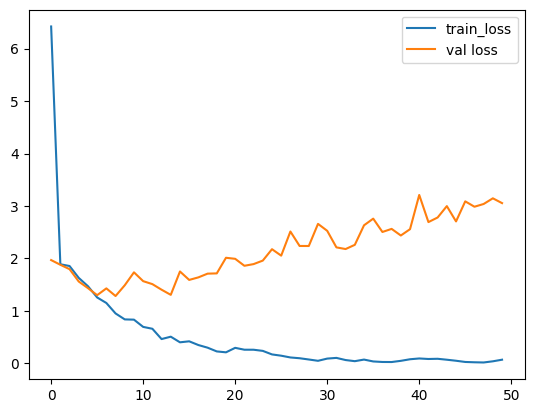

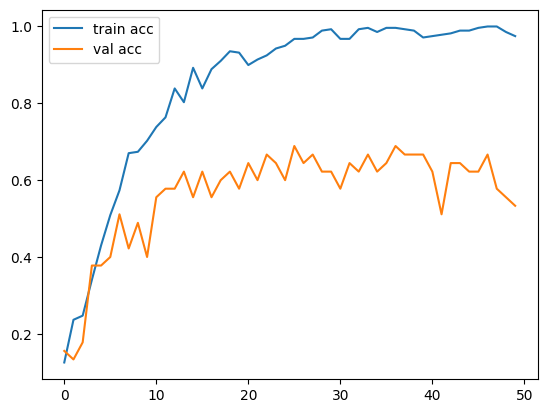

<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [7]:
y_pred = Classifier.predict(test_set)



print(y_pred)

2/2 [==============================] - 0s 55ms/step
[[1.03888713e-04 2.14622919e-09 1.30560562e-09 3.54832196e-06
  2.23903453e-06 9.99402523e-01 4.87729179e-04]
 [1.71610955e-05 1.52892038e-01 5.70823158e-06 1.40766345e-03
  2.10946542e-04 3.42686214e-02 8.11197817e-01]
 [1.98931843e-06 1.47781957e-14 2.84439817e-13 3.52035669e-21
  9.49596345e-01 5.04015945e-02 1.33821886e-26]
 [5.37776796e-05 9.99795139e-01 1.35732946e-04 8.12818996e-07
  9.02455042e-07 1.02746480e-05 3.38838367e-06]
 [2.18714515e-04 8.42074188e-11 9.99781311e-01 4.31056602e-16
  8.51747194e-14 2.61850054e-14 5.91809435e-10]
 [9.26085472e-01 1.38534760e-05 2.42083013e-04 7.11453035e-02
  2.50687147e-03 4.61835814e-09 6.43077738e-06]
 [1.56756380e-06 4.74437893e-12 2.02912903e-12 1.66306037e-07
  9.51014102e-01 4.89839688e-02 1.91196108e-07]
 [5.13659734e-06 2.68761933e-01 1.22866531e-05 3.46777051e-05
  4.83861641e-06 4.44534584e-04 7.30736554e-01]
 [4.85331952e-09 5.01159889e-07 2.11490783e-06 1.21413539e-11
  2.34

In [8]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_true = test_set.classes
accuracy = np.mean(y_pred == y_true) * 100

print(f"Accuracy: {accuracy:.2f}%")

print(y_pred)

Accuracy: 17.78%
[5 6 4 1 2 0 4 6 6 6 0 1 0 0 2 1 4 1 2 3 0 2 1 0 3 2 4 1 6 6 6 0 0 0 6 4 6
 4 6 5 0 3 0 6 0]


In [10]:
from tensorflow.keras.preprocessing import image


img=image.load_img('C:/abhinav/Proj/Test/2Thousandnote/32.jpg',
                   target_size=(224,224))

test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

result = Classifier.predict(test_image)
print(result)

a=np.argmax(result, axis=1)

print(a==0)
print(a==1)
print(a==2)
print(a==3)
print(a==4)
print(a==5)
print(a==6)



1/1 [==============================] - 0s 20ms/step
[[0. 0. 1. 0. 0. 0. 0.]]
[False]
[False]
[ True]
[False]
[False]
[False]
[False]


In [11]:
# save it as a h5 file

from tensorflow.keras.models import load_model

Classifier.save('C:/abhinav/Proj/model_classifier.h5')



In [12]:
# load h5 file



from tensorflow.keras.models import load_model

model=load_model('C:/abhinav/Proj/model_classifier.h5')


